## Dataset source: http://archive.ics.uci.edu/ml/datasets/Heart+Disease

Blog link: https://datageekswithml.blogspot.com/2018/09/machine-learning-6-nearest-neighbor.html

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
data = pd.read_csv("Heart_data_labels.csv")
data["Out"] = (data["Out"] > 0)*1

In [76]:
data.head(7)

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,pldpeak,slope,ca,thal,Out
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
Age         297 non-null int64
Sex         297 non-null int64
CP          297 non-null int64
Trestbps    297 non-null int64
Chol        297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
pldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
Out         297 non-null int32
dtypes: float64(1), int32(1), int64(12)
memory usage: 31.4 KB


 ### Observation: No missing Values

In [78]:
data.describe()

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,pldpeak,slope,ca,thal,Out
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Data explanation from the source:
#### age: 
age in years
#### sex:
sex (1 = male; 0 = female) 
#### cp:
chest pain type<br> 
        1: typical angina<br> 
        2: atypical angina<br> 
        3: non-anginal pain<br> 
        4: asymptomatic<br> 
#### trestbps:
resting blood pressure (in mm Hg on admission to the hospital)
#### chol:
serum cholestoral in mg/dl 
#### fbs:
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### restecg:
resting electrocardiographic results<br> 
        0: normal <br>
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br> 
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
#### thalach:
maximum heart rate achieved 
#### exang:
exercise induced angina (1 = yes; 0 = no) <br>
#### pldpeak 
ST depression induced by exercise relative to rest<br> 
#### slope:
the slope of the peak exercise ST segment <br>
        1: upsloping <br>
        2: flat <br>
        3: downsloping<br>
#### ca:
number of major vessels (0-3) colored by flourosopy 
#### thal:
        3: normal
        6: fixed defect
        7: reversable defect
        

## Data classification

1. age : Numeric | Continuous
2. sex : Categorical | Nominal
3. cp : Categorical | Nominal
4. trestbps : Numeric | Continuous
5. chol : Numeric | Continuous
6. fbs : Categorical | Nominal
7. restecg : Categorical | Nominal 
8. thalach : Numeric | Continuous
9. exang : Categorical | Nominal
10. pldpeak :Numeric | Continuous
11. slope : Categorical | Nominal
12. ca : Categorical | Ordinal
13. thal : Categorical | Nominal
14. Out : Categorical | Nominal

In [79]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data.drop("Out",axis = 1), data["Out"], test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [80]:
X_train.head(10)

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,pldpeak,slope,ca,thal
94,52,1,4,128,255,0,0,161,1,0.0,1,1,7
24,60,1,4,130,206,0,2,132,1,2.4,2,2,7
191,68,0,3,120,211,0,2,115,0,1.5,2,0,3
92,44,0,3,108,141,0,0,175,0,0.6,2,0,3
39,61,1,3,150,243,1,0,137,1,1.0,2,0,3
89,66,1,4,120,302,0,2,151,0,0.4,2,0,3
243,58,1,4,100,234,0,0,156,0,0.1,1,1,7
154,70,1,4,130,322,0,2,109,0,2.4,2,3,3
141,52,1,2,128,205,1,0,184,0,0.0,1,0,3
162,58,0,4,100,248,0,2,122,0,1.0,2,0,3


In [81]:
X_val.iloc[0]

Age          43.0
Sex           1.0
CP            3.0
Trestbps    130.0
Chol        315.0
fbs           0.0
restecg       0.0
thalach     162.0
exang         0.0
pldpeak       1.9
slope         1.0
ca            1.0
thal          3.0
Name: 176, dtype: float64

In [82]:
print("Training: ",len(X_train))
print("Validation: ",len(X_val))
print("Testing: ",len(X_test))

Training:  240
Validation:  27
Testing:  30


In [83]:
K = [1,3,5,7,9,11]

In [84]:
def KNearestNeighbours(Training,testCase):
    df = pd.DataFrame(columns=['Distance','Out'])
    for i in range(len(Training)):
        df.loc[i] = [np.sqrt(sum((Training.iloc[i] - testCase)**2)), y_train.iloc[i]]
    df = df.sort_values("Distance",ascending = False)
    return df


In [85]:
final = pd.DataFrame(columns=['K=1','K=3','K=5','K=7','K=9',"K=11"])
for i in range(len(X_val)):
    res = KNearestNeighbours(X_train,X_val.iloc[i])
    temp_list = []
    for k in K:
        temp = res.head(k)
        m = stats.mode(temp['Out'])
        temp_list.append(int(m[0][0]))
    final.loc[i] = temp_list

In [86]:
final.head(25)

,K=1,K=3,K=5,K=7,K=9,K=11
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,1,1
5,0,0,0,0,0,0
6,0,0,0,0,1,1
7,0,0,0,0,0,1
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [87]:
Accuracy = []
Accuracy.append(round(accuracy_score(y_val, list(final['K=1'])),2))
Accuracy.append(round(accuracy_score(y_val, list(final['K=3'])),2))
Accuracy.append(round(accuracy_score(y_val, list(final['K=5'])),2))
Accuracy.append(round(accuracy_score(y_val, list(final['K=7'])),2))
Accuracy.append(round(accuracy_score(y_val, list(final['K=9'])),2))
Accuracy.append(round(accuracy_score(y_val, list(final['K=11'])),2))

In [88]:
for i in range(len(K)):
    print("K= ",K[i]," Accuracy: ",Accuracy[i])

K=  1  Accuracy:  0.67
K=  3  Accuracy:  0.67
K=  5  Accuracy:  0.63
K=  7  Accuracy:  0.67
K=  9  Accuracy:  0.52
K=  11  Accuracy:  0.33


[0, 12, 0, 1]

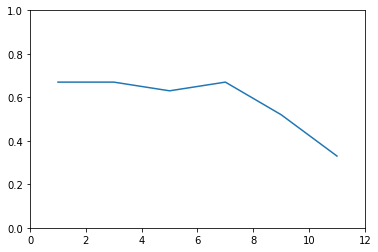

In [89]:
plt.plot(K,Accuracy)
plt.axis([0, 12, 0, 1])

In [90]:
def ModifiedKNearestNeighbours(Training,testCase):
    df = pd.DataFrame(columns=['Distance','Out'])
    for i in range(len(Training)):
        df.loc[i] = [np.sqrt(sum((Training.iloc[i] - testCase)**2)), y_train.iloc[i]]
    min_distance = min(df["Distance"])
    df["Distance"] = 1 / ((df["Distance"] - min_distance) + 1)
    df = df.sort_values("Distance",ascending = False)
    return df

In [91]:
final = pd.DataFrame(columns=['K=1','K=3','K=5','K=7','K=9',"K=11"])
for i in range(len(X_val)):
    res = ModifiedKNearestNeighbours(X_train,X_val.iloc[i])
    temp_list = []
    for k in K:
        temp = res.head(k)
        class_0 = sum(temp[temp['Out'] == 0]["Distance"])
        class_1 = sum(temp[temp['Out'] == 1]["Distance"])
        if class_0 > class_1:
            temp_list.append(0)
        else:
            temp_list.append(1)        
    final.loc[i] = temp_list

In [92]:
final.head(25)

,K=1,K=3,K=5,K=7,K=9,K=11
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,1,1,1,1,1,1
9,1,1,1,1,0,0


In [93]:
Modified_Accuracy = []
Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=1'])),2))
Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=3'])),2))
Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=5'])),2))
Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=7'])),2))
Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=9'])),2))
Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=11'])),2))

In [94]:
for i in range(len(K)):
    print("K= ",K[i]," Accuracy: ",Modified_Accuracy[i])

K=  1  Accuracy:  0.74
K=  3  Accuracy:  0.7
K=  5  Accuracy:  0.7
K=  7  Accuracy:  0.7
K=  9  Accuracy:  0.74
K=  11  Accuracy:  0.74


[0, 12, 0, 1]

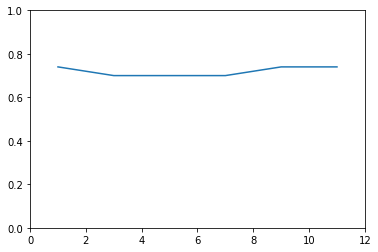

In [95]:
plt.plot(K,Modified_Accuracy)
plt.axis([0, 12, 0, 1])

In [96]:
from sklearn import preprocessing
x = data.drop("Out",axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)

In [97]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, data["Out"], test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [98]:
X_train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
94,0.479167,1.0,1.000000,0.320755,0.294521,0.0,0.0,0.687023,1.0,0.000000,0.0,0.333333,1.0
24,0.645833,1.0,1.000000,0.339623,0.182648,0.0,1.0,0.465649,1.0,0.387097,0.5,0.666667,1.0
191,0.812500,0.0,0.666667,0.245283,0.194064,0.0,1.0,0.335878,0.0,0.241935,0.5,0.000000,0.0
92,0.312500,0.0,0.666667,0.132075,0.034247,0.0,0.0,0.793893,0.0,0.096774,0.5,0.000000,0.0
39,0.666667,1.0,0.666667,0.528302,0.267123,1.0,0.0,0.503817,1.0,0.161290,0.5,0.000000,0.0
89,0.770833,1.0,1.000000,0.245283,0.401826,0.0,1.0,0.610687,0.0,0.064516,0.5,0.000000,0.0
243,0.604167,1.0,1.000000,0.056604,0.246575,0.0,0.0,0.648855,0.0,0.016129,0.0,0.333333,1.0
154,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.0
141,0.479167,1.0,0.333333,0.320755,0.180365,1.0,0.0,0.862595,0.0,0.000000,0.0,0.000000,0.0
162,0.604167,0.0,1.000000,0.056604,0.278539,0.0,1.0,0.389313,0.0,0.161290,0.5,0.000000,0.0


In [99]:
final = pd.DataFrame(columns=['K=1','K=3','K=5','K=7','K=9',"K=11"])
for i in range(len(X_val)):
    res = KNearestNeighbours(X_train,X_val.iloc[i])
    temp_list = []
    for k in K:
        temp = res.head(k)
        m = stats.mode(temp['Out'])
        temp_list.append(int(m[0][0]))
    final.loc[i] = temp_list
Norm_Accuracy = []
Norm_Accuracy.append(round(accuracy_score(y_val, list(final['K=1'])),2))
Norm_Accuracy.append(round(accuracy_score(y_val, list(final['K=3'])),2))
Norm_Accuracy.append(round(accuracy_score(y_val, list(final['K=5'])),2))
Norm_Accuracy.append(round(accuracy_score(y_val, list(final['K=7'])),2))
Norm_Accuracy.append(round(accuracy_score(y_val, list(final['K=9'])),2))
Norm_Accuracy.append(round(accuracy_score(y_val, list(final['K=11'])),2))

In [100]:
for i in range(len(K)):
    print("K= ",K[i]," Accuracy: ",Norm_Accuracy[i])

K=  1  Accuracy:  0.22
K=  3  Accuracy:  0.11
K=  5  Accuracy:  0.04
K=  7  Accuracy:  0.15
K=  9  Accuracy:  0.04
K=  11  Accuracy:  0.04


[0, 12, 0, 1]

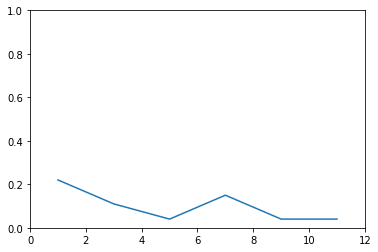

In [101]:
plt.plot(K,Norm_Accuracy)
plt.axis([0, 12, 0, 1])

In [102]:
final = pd.DataFrame(columns=['K=1','K=3','K=5','K=7','K=9',"K=11"])
for i in range(len(X_val)):
    res = ModifiedKNearestNeighbours(X_train,X_val.iloc[i])
    temp_list = []
    for k in K:
        temp = res.head(k)
        class_0 = sum(temp[temp['Out'] == 0]["Distance"])
        class_1 = sum(temp[temp['Out'] == 1]["Distance"])
        if class_0 > class_1:
            temp_list.append(0)
        else:
            temp_list.append(1)        
    final.loc[i] = temp_list

In [103]:
Norm_Modified_Accuracy = []
Norm_Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=1'])),2))
Norm_Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=3'])),2))
Norm_Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=5'])),2))
Norm_Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=7'])),2))
Norm_Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=9'])),2))
Norm_Modified_Accuracy.append(round(accuracy_score(y_val, list(final['K=11'])),2))

In [104]:
for i in range(len(K)):
    print("K= ",K[i]," Accuracy: ",Norm_Modified_Accuracy[i])

K=  1  Accuracy:  0.78
K=  3  Accuracy:  0.89
K=  5  Accuracy:  0.85
K=  7  Accuracy:  0.85
K=  9  Accuracy:  0.89
K=  11  Accuracy:  0.89


[0, 12, 0, 1]

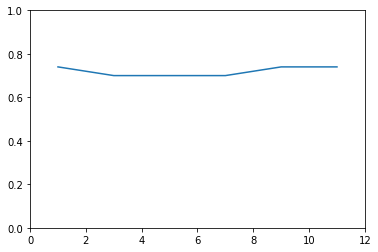

In [105]:
plt.plot(K,Modified_Accuracy)
plt.axis([0, 12, 0, 1])